# Import libraries and data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [30]:
df = pd.read_csv('104_IT_jobs.csv')

In [31]:
df.head(1)

,job_item_name,job_item_comapny,job_item_area,job_item_experience,job_item_degree,job_item_salary,job_item_description
0,Senior Embedded Software Engineer -觸控優先,邁新科技有限公司,新北市林口區,經歷不拘,專科,"月薪100,000~190,000元",We are looking forward to building a team of S...


# Analysis

## Helper functions

In [32]:
def extract_number(x):
    """ Extract the number from a string
    """
    x = x.replace(',','')
    return re.findall(r'\d+', x)

def extract_bottom(x):
    return x[0]

def extract_top(x):
    return x[1]

In [49]:
def to_numeric(x):
    return pd.to_numeric(x)

## Classify the salary into three categories

In [33]:
df_annual_sal = df[df['job_item_salary'].str.contains('年薪')]
df_month_sal = df[df['job_item_salary'].str.contains('月薪')]
df_negotiate = df[df['job_item_salary'].str.contains('面議')]

- It seems in the IT field, most of the jobs are negotiable, but opaque.
- roughly 37% of the jobs provide the salary information, and mostly the monthly paid.

In [34]:
# pie chart
len(df_annual_sal)/len(df), len(df_month_sal)/len(df), len(df_negotiate)/len(df)

(0.019939577039274924, 0.3619335347432024, 0.6114803625377644)

In [35]:
x = extract_number('月薪100,000~190,000元')
type(x)

list

### Get the bottom salary from the monthly salary group
- There is not top salary in some of the jobs.

In [46]:
df_month_sal['sal_list'] = df_month_sal['job_item_salary'].map((extract_number))

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/32509577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['sal_list'] = df_month_sal['job_item_salary'].map((extract_number))


In [48]:
# extract the data from job_item_salary column
df_month_sal['bottom_sal'] = df_month_sal['sal_list'].map((extract_bottom))

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/2085977989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['bottom_sal'] = df_month_sal['sal_list'].map((extract_bottom))


In [42]:
df_month_sal['bottom_sal'].head(1)

0    100000
Name: bottom_sal, dtype: object

In [50]:
df_month_sal['bottom_sal'] = df_month_sal['bottom_sal'].map(to_numeric)

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/1394088323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['bottom_sal'] = df_month_sal['bottom_sal'].map(to_numeric)


### Summary
- Mostly, the bottom salary is around 30,000 NTD.
- The average salary is around 38,000 NTD.
- The lowest salary is around 27,000 NTD.
- The highest salary is around 100,000 NTD.

<AxesSubplot:>

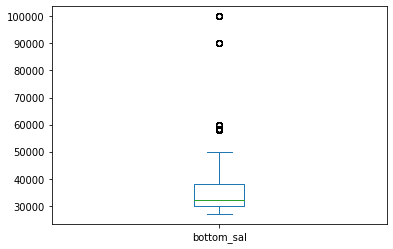

In [57]:
df_month_sal['bottom_sal'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

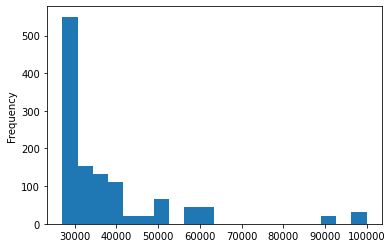

In [61]:
df_month_sal['bottom_sal'].plot(kind='hist', bins=20)

In [62]:
df_month_sal['bottom_sal'].describe()

count      1198.000000
mean      38281.552588
std       15318.904820
min       27000.000000
25%       30000.000000
50%       32000.000000
75%       38000.000000
max      100000.000000
Name: bottom_sal, dtype: float64

## Annual salary analysis

In [63]:
df_annual_sal['job_item_salary'].head()

626    年薪840,000~1,300,000元
627    年薪840,000~1,300,000元
628    年薪840,000~1,300,000元
629    年薪840,000~1,300,000元
630    年薪840,000~1,300,000元
Name: job_item_salary, dtype: object

In [67]:
df_annual_sal['bottom_sal'] = df_annual_sal['job_item_salary'].map(extract_number)
df_annual_sal['bottom_sal'] = df_annual_sal['bottom_sal'].map(extract_bottom)

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/473244264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['bottom_sal'] = df_annual_sal['job_item_salary'].map(extract_number)
C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/473244264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['bottom_sal'] = df_annual_sal['bottom_sal'].map(extract_bottom)


In [68]:
df_annual_sal['top_sal'] = df_annual_sal['job_item_salary'].map(extract_number)
df_annual_sal['top_sal'] = df_annual_sal['top_sal'].map(extract_top)

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/1589032523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['top_sal'] = df_annual_sal['job_item_salary'].map(extract_number)
C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/1589032523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['top_sal'] = df_annual_sal['top_sal'].map(extract_top)


In [69]:
df_annual_sal['bottom_sal'] = df_annual_sal['bottom_sal'].map(to_numeric)
df_annual_sal['top_sal'] = df_annual_sal['top_sal'].map(to_numeric)

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/2369787870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['bottom_sal'] = df_annual_sal['bottom_sal'].map(to_numeric)
C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/2369787870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['top_sal'] = df_annual_sal['top_sal'].map(to_numeric)


In [74]:
df_annual_sal['bottom_monthly_transform'] = df_annual_sal['bottom_sal']/12
df_annual_sal['top_monthly_transform'] = df_annual_sal['top_sal']/12

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/829888425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['bottom_monthly_transform'] = df_annual_sal['bottom_sal']/12
C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/829888425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_sal['top_monthly_transform'] = df_annual_sal['top_sal']/12


### Summary
- In the bottom annual salary group, the average annual salary is around 54,000 NTD; 90,000 NTD in the top annual salary group.
- overall, divided the annual salary into twelve months, the average salary is higher than monthly paid group.

In [76]:
df_annual_sal['bottom_monthly_transform'].describe()

count       66.000000
mean     53888.888889
std      15412.652515
min      33333.333333
25%      33333.333333
50%      58333.333333
75%      70000.000000
max      70000.000000
Name: bottom_monthly_transform, dtype: float64

In [77]:
df_annual_sal['top_monthly_transform'].describe()

count        66.000000
mean      92222.222222
std       35502.899043
min       43333.333333
25%       43333.333333
50%      108333.333333
75%      125000.000000
max      125000.000000
Name: top_monthly_transform, dtype: float64